In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("bank-full.csv", sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 17)

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data['y'] = data.y.map(dict(yes=1, no=0))
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [8]:
# Numerical variables
num_data = data.select_dtypes(include='number')
num_data.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0


In [9]:
# Categorical variables
cat_data = data.select_dtypes(exclude='number')
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [10]:
df=pd.get_dummies(cat_data)
df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
data_new = pd.concat([df, num_data], axis=1)

In [12]:
data_new

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,0,1,58,2143,5,261,1,-1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,44,29,5,151,1,-1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,33,2,5,76,1,-1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,47,1506,5,92,1,-1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,1,51,825,17,977,3,-1,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,1,71,1729,17,456,2,-1,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,1,0,72,5715,17,1127,5,184,3,1
45209,0,1,0,0,0,0,0,0,0,0,...,0,1,57,668,17,508,4,-1,0,0


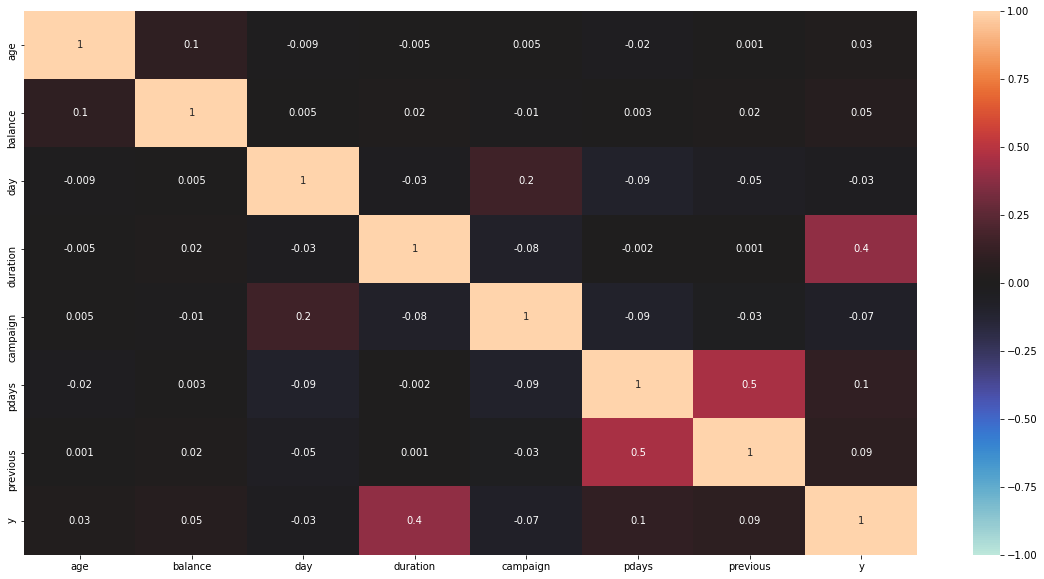

In [13]:
# using heatmap to visualize correlation between the columns
plt.figure(figsize=(20,10))
ax = sns.heatmap(data.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)# setting the parameters
plt.show()

In [14]:
X = data_new.drop(columns=["y"])
y = data_new["y"]
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (45211, 51)
y shape: (45211,)


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
# printing the shape of training set
print(f'Train set X shape: {X_train.shape}')
print(f'Train set y shape: {y_train.shape}')
# printing the shape of test set
print(f'Test set X shape: {X_test.shape}')
print(f'Test set y shape: {y_test.shape}')

Train set X shape: (36168, 51)
Train set y shape: (36168,)
Test set X shape: (9043, 51)
Test set y shape: (9043,)


In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
df1 = pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred})
df1

,Actual_Values,Predicted_Values
3610,0,0
11677,0,0
33018,0,0
44323,1,0
8119,0,0
...,...,...
22959,0,0
26059,0,0
18593,0,0
6959,0,0


In [19]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[7841  152]
 [ 819  231]]


In [20]:
((7841+231)/(7841+152+819+231))*100

89.26241291606767

In [21]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7993
           1       0.60      0.22      0.32      1050

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



Text(0, 0.5, 'True Positive Rate')

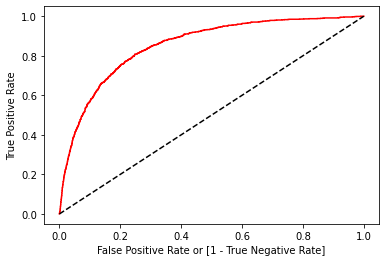

In [22]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,-1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [23]:
auc

0.6004916802201926